In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df_train = pd.read_csv("C:\\Users\\maste\\Downloads\\train.csv\\train.csv")
print(f"Train: {df_train.shape}")
df_test = pd.read_csv("C:\\Users\\maste\\Downloads\\test.csv\\test.csv")
print(f"Test: {df_test.shape}")

df_train.head()

Train: (3116945, 22)
Test: (2077964, 21)


,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [11]:
df_train.isnull().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

# Tratamento de Valores Ausentes

Remoção das linhas das colunas com poucos valores ausentes e preenchimento dos valores ausentes com a string "missing" nas colunas com muitos valores ausentes.

In [14]:
colunas_few_missing = df_train.columns[(df_train.isnull().sum() > 0) & (df_train.isnull().sum() < 60)]

df_train_new = df_train.dropna(subset=colunas_few_missing)

In [16]:
df_train_new.isnull().sum()

id                            0
class                         0
cap-diameter                  0
cap-shape                     0
cap-surface              670948
cap-color                     0
does-bruise-or-bleed          0
gill-attachment          523876
gill-spacing            1258317
gill-color                    0
stem-height                   0
stem-width                    0
stem-root               2756822
stem-surface            1980676
stem-color                    0
veil-type               2957273
veil-color              2740741
has-ring                      0
ring-type                128850
spore-print-color       2849483
habitat                       0
season                        0
dtype: int64

In [18]:
# Obter colunas com muitos valores ausentes
colunas_many_missing = df_train_new.columns[df_train_new.isnull().sum() > 0]

# Preencher as linhas onde essas colunas têm valores ausentes
df_train_new_filled = df_train_new.copy()
df_train_new_filled[colunas_many_missing] = df_train_new_filled[colunas_many_missing].fillna("missing")
df_train_new_filled.isnull().sum()

id                      0
class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64

In [20]:
df_train_new_filled.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,missing,missing,w,missing,missing,f,f,missing,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,missing,y,o,missing,missing,t,z,missing,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,missing,s,n,missing,missing,f,f,missing,l,w
3,3,e,3.88,f,y,g,f,s,missing,g,...,missing,missing,w,missing,missing,f,f,missing,d,u
4,4,e,5.85,x,l,w,f,d,missing,w,...,missing,missing,w,missing,missing,f,f,missing,g,a


# Análise de Contagem de Valores
A função imprime a contagem de valores e a porcentagem de cada valor para cada coluna.

In [23]:
def mostrar_contagens_valores(dados):
    for coluna in dados.columns:
        print(f"\nContagem de valores e percentuais para {coluna}:")
        contagens = dados[coluna].value_counts()
        percentuais = dados[coluna].value_counts(normalize=True) * 100

        # Combinar contagens e percentuais em um DataFrame formatado
        resumo = pd.DataFrame({
            'Frequência': contagens,
            'Percentual (%)': percentuais.round(2)
        })
        print(resumo)
        print("-" * 50)

In [25]:
mostrar_contagens_valores(df_train_new_filled.iloc[:, 1:])


Contagem de valores e percentuais para class:
       Frequência  Percentual (%)
class                            
p         1705278           54.71
e         1411439           45.29
--------------------------------------------------

Contagem de valores e percentuais para cap-diameter:
              Frequência  Percentual (%)
cap-diameter                            
1.49                8163            0.26
3.18                7942            0.25
3.14                7361            0.24
1.51                7072            0.23
4.04                6827            0.22
...                  ...             ...
58.19                  1            0.00
31.59                  1            0.00
24.93                  1            0.00
58.76                  1            0.00
54.07                  1            0.00

[3913 rows x 2 columns]
--------------------------------------------------

Contagem de valores e percentuais para cap-shape:
           Frequência  Percentual (%)
cap-shape     

# Filtrando Categorias Raras
Removemos as linhas que contêm valores raros (que ocorrem menos de 200 vezes) para cada coluna (excluindo 'id' e 'class').

In [30]:
# Selecionar colunas para verificar, exceto o 'id' e a 'class'
colunas_para_verificar = [coluna for coluna in df_train_new_filled.columns if coluna not in ['id', 'class']]

df_filtrado = df_train_new_filled.copy()

for coluna in colunas_para_verificar:
    contagem_valores = df_train_new_filled[coluna].value_counts()

    # Valores que aparecem menos de 200 vezes
    valores_raros = contagem_valores[contagem_valores < 200].index
    
    if len(valores_raros) > 0:
        print(f"\nRemovendo valores raros da coluna {coluna}:")
        print(valores_raros.tolist())
        
        # Criar máscara para filtrar o DataFrame
        filtro = ~df_filtrado[coluna].isin(valores_raros)
        df_filtrado = df_filtrado[filtro]

print(f"\nNúmero de linhas restantes: {len(df_filtrado)}")


Removendo valores raros da coluna cap-diameter:
[15.07, 13.54, 12.84, 15.04, 12.82, 16.6, 17.08, 14.68, 13.67, 0.5, 15.99, 17.37, 14.98, 14.22, 18.76, 17.95, 13.28, 16.02, 14.88, 14.78, 15.09, 19.51, 13.09, 17.69, 14.12, 17.16, 11.72, 16.92, 12.9, 18.74, 17.49, 18.07, 12.97, 18.58, 14.3, 16.18, 16.84, 15.28, 19.61, 19.95, 16.91, 16.67, 17.8, 15.69, 52.3, 17.51, 12.85, 19.26, 17.21, 16.45, 18.91, 19.64, 15.72, 12.5, 12.94, 18.98, 17.02, 21.29, 15.77, 18.79, 16.05, 17.84, 13.47, 17.3, 18.51, 17.42, 13.6, 18.59, 13.5, 15.88, 16.74, 12.76, 13.62, 16.29, 16.97, 18.26, 15.96, 16.56, 10.71, 17.48, 19.74, 12.71, 14.04, 17.86, 18.69, 19.68, 17.34, 17.22, 16.65, 13.52, 18.39, 17.9, 18.65, 0.52, 17.29, 18.71, 12.55, 18.29, 14.11, 19.37, 16.24, 10.63, 14.6, 16.03, 14.72, 17.61, 17.85, 22.32, 17.91, 17.38, 18.14, 14.03, 15.68, 13.34, 18.95, 17.64, 19.53, 13.78, 19.19, 17.2, 18.85, 17.76, 13.68, 15.94, 19.99, 15.01, 18.8, 15.93, 16.68, 18.19, 18.96, 10.81, 17.58, 18.38, 16.58, 16.46, 19.46, 16.35, 

In [32]:
mostrar_contagens_valores(df_filtrado.iloc[:, 1:])


Contagem de valores e percentuais para class:
       Frequência  Percentual (%)
class                            
p         1584398           54.45
e         1325462           45.55
--------------------------------------------------

Contagem de valores e percentuais para cap-diameter:
              Frequência  Percentual (%)
cap-diameter                            
1.49                8034            0.28
3.18                7901            0.27
3.14                7350            0.25
1.51                6970            0.24
3.28                6797            0.23
...                  ...             ...
19.32                 95            0.00
17.59                 92            0.00
17.60                 89            0.00
17.98                 88            0.00
17.89                 74            0.00

[1497 rows x 2 columns]
--------------------------------------------------

Contagem de valores e percentuais para cap-shape:
           Frequência  Percentual (%)
cap-shape     

In [36]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2909860 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory usag

# Engenharia de Features e Codificação
Separamos a variável alvo e realizamos a codificação one-hot para as variáveis categóricas.

In [39]:
# Separar a variável alvo
target = df_filtrado['class']
df_sem_target = df_filtrado.drop(['class'], axis=1)

# Selecionar colunas numéricas e categóricas
colunas_numericas = df_sem_target.select_dtypes(include=['int64', 'float64']).columns
colunas_categoricas = df_sem_target.select_dtypes(include=['object']).columns

# Aplicar one-hot encoding nas colunas categóricas
colunas_codificadas = pd.get_dummies(df_sem_target[colunas_categoricas], prefix=colunas_categoricas)

# Combinar colunas numéricas com as colunas codificadas
df_codificado = pd.concat([df_sem_target[colunas_numericas], colunas_codificadas], axis=1)

df_codificado.head()

,id,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,0,8.80,4.51,15.39,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1,4.51,4.79,6.48,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,2,6.94,6.85,9.93,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,3,3.88,4.16,6.53,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,4,5.85,3.37,8.36,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077964 entries, 0 to 2077963
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), int64(1), object(17)
memory usage: 332.9+ MB


# Pré-processamento dos Dados de Teste
Aplicamos tratamentos semelhantes para valores ausentes e codificação no conjunto de teste. O conjunto de teste não contém a variável alvo

In [48]:
df_teste_processado = df_test.copy()

# Selecionar colunas numéricas e categóricas
colunas_numericas_teste = df_teste_processado.select_dtypes(include=['int64', 'float64']).columns
colunas_categoricas_teste = df_teste_processado.select_dtypes(include=['object']).columns

# Preencher valores ausentes nas colunas numéricas com a média
for coluna_num in colunas_numericas_teste:
    df_teste_processado[coluna_num] = df_teste_processado[coluna_num].fillna(df_teste_processado[coluna_num].mean())

# Preencher valores ausentes nas colunas categóricas com a string "missing"
for coluna_cat in colunas_categoricas_teste:
    df_teste_processado[coluna_cat] = df_teste_processado[coluna_cat].fillna("missing")

df_teste_processado.isnull().sum()

id                      0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64

In [50]:
# Aplicando one-hot encoding nas colunas categóricas do conjunto de teste
colunas_codificadas_teste = pd.get_dummies(df_teste_processado[colunas_categoricas_teste], prefix=colunas_categoricas_teste)

# Identificando colunas presentes no teste, mas não no treino
colunas_para_remover = [col for col in colunas_codificadas_teste.columns if col not in colunas_codificadas.columns]

# Removendo essas colunas do conjunto de teste
colunas_codificadas_teste = colunas_codificadas_teste.drop(columns=colunas_para_remover)

# Adicionar colunas que existem no treino, mas faltam no teste, preenchendo com False
colunas_faltantes = [col for col in colunas_codificadas.columns if col not in colunas_codificadas_teste.columns]
for col in colunas_faltantes:
    colunas_codificadas_teste[col] = False

# Garantir que as colunas estejam na mesma ordem do conjunto de treino
colunas_codificadas_teste = colunas_codificadas_teste[colunas_codificadas.columns]

# Recombinar com as colunas numéricas
df_teste_codificado = pd.concat([df_teste_processado[colunas_numericas_teste], colunas_codificadas_teste], axis=1)

df_teste_codificado.head()

,id,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,3116945,8.64,11.13,17.12,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,3116946,6.90,1.27,10.75,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,3116947,2.00,6.18,3.14,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,3116948,3.47,4.98,8.51,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,3116949,6.17,6.73,13.70,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


# Dividindo os Dados em Conjuntos de Treinamento e Validação
Dividimos os dados de treinamento em um conjunto de treino e um conjunto de validação, garantindo que a distribuição das classes seja mantida (estratificação).

In [55]:
SEED = 42

from sklearn.model_selection import train_test_split

X_treino, X_validacao, y_treino, y_validacao = train_test_split(
    df_codificado.drop(['id'], axis=1),
    target,
    test_size=0.2,
    random_state=SEED,
    stratify=target
)

print(f"Formato do conjunto de treino: {X_treino.shape}")
print(f"Formato do conjunto de validação: {X_validacao.shape}")

Formato do conjunto de treino: (2327888, 128)
Formato do conjunto de validação: (581972, 128)


# Escalonamento de Features
Usamos o StandardScaler para padronizar as features.

In [62]:
from sklearn.preprocessing import StandardScaler

normalizador = StandardScaler()
X_treino_normalizado = normalizador.fit_transform(X_treino)
X_validacao_normalizado = normalizador.transform(X_validacao)

# Função de Treinamento e Avaliação do Modelo

In [65]:
def treinar_modelo(classificador, y_treino=y_treino, y_validacao=y_validacao):
    classificador.fit(X_treino_normalizado, y_treino)
    predicoes = classificador.predict(X_validacao_normalizado)
    predicoes_proba = classificador.predict_proba(X_validacao_normalizado)[:, 1]
    
    return predicoes, predicoes_proba

In [67]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def avaliar_modelo(y_validacao, predicoes, predicoes_proba):    
    acuracia = accuracy_score(y_validacao, predicoes)
    f1 = f1_score(y_validacao, predicoes, average='weighted')
    auc_roc = roc_auc_score(y_validacao, predicoes_proba)
    matriz_confusao = confusion_matrix(y_validacao, predicoes)

    print(f"Acurácia: {acuracia:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nMatriz de Confusão:")
    print(matriz_confusao)
    print(f"\nAUC-ROC: {auc_roc:.4f}")

    # Gerar Curva ROC
    taxa_falso_positivo, taxa_verdadeiro_positivo, _ = roc_curve(y_validacao, predicoes_proba)
    plt.figure()
    plt.plot(taxa_falso_positivo, taxa_verdadeiro_positivo, label=f'Curva ROC (área = {auc_roc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

In [69]:
from sklearn.preprocessing import LabelEncoder

codificador = LabelEncoder()
y_treino_codificado = codificador.fit_transform(y_treino)
y_validacao_codificado = codificador.transform(y_validacao)

# Modelo de Regressão Logística

In [86]:
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
import time

print("Iniciando o treinamento do modelo de Regressão Logística...")

for _ in tqdm(range(100), desc="Preparando..."):
    time.sleep(0.01) 

# Instancia e treina o modelo com verbose para mostrar progresso real
modelo_rl = LogisticRegression(max_iter=5000, random_state=SEED, verbose=1)
respostas_rl, probabilidades_rl = treinar_modelo(modelo_rl, y_treino_codificado, y_validacao_codificado)

print("✅ Treinamento concluído com sucesso!")


Iniciando o treinamento do modelo de Regressão Logística...


Preparando...: 100%|█████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 94.49it/s]


✅ Treinamento concluído com sucesso!


Acurácia: 0.8697
F1 Score: 0.8697

Matriz de Confusão:
[[228537  36555]
 [ 39298 277582]]

AUC-ROC: 0.9373


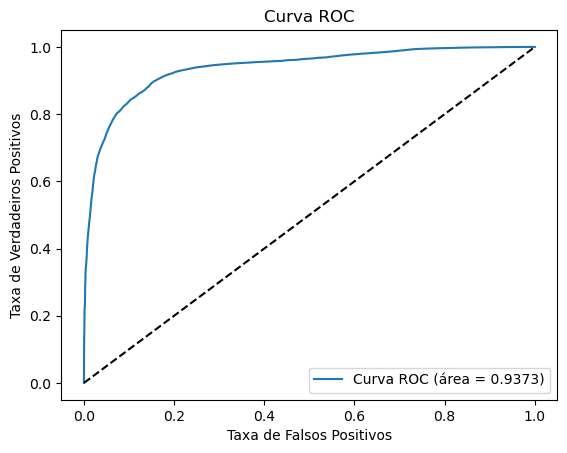

In [88]:
avaliar_modelo(y_validacao_codificado, respostas_rl, probabilidades_rl)

# Classificador Random Forest
Treinamento e avaliação com um modelo de Random Forest com hiperparâmetros específicos 

In [95]:
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
import time

print("Iniciando o treinamento do modelo Random Forest...")

# Simula uma barra de carregamento
for _ in tqdm(range(100), desc="Carregando..."):
    time.sleep(0.01)

# Instancia e treina o modelo
modelo_floresta = RandomForestClassifier(
    n_estimators=500,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    random_state=SEED  
)

predicoes_floresta, probabilidades_floresta = treinar_modelo(
    modelo_floresta,
    y_treino_codificado,
    y_validacao_codificado
)

print("✅ Treinamento do modelo Random Forest concluído com sucesso!")

Iniciando o treinamento do modelo Random Forest...


Carregando...: 100%|█████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 93.51it/s]


✅ Treinamento do modelo Random Forest concluído com sucesso!


Acurácia: 0.9920
F1 Score: 0.9920

Matriz de Confusão:
[[263415   1677]
 [  3000 313880]]

AUC-ROC: 0.9966


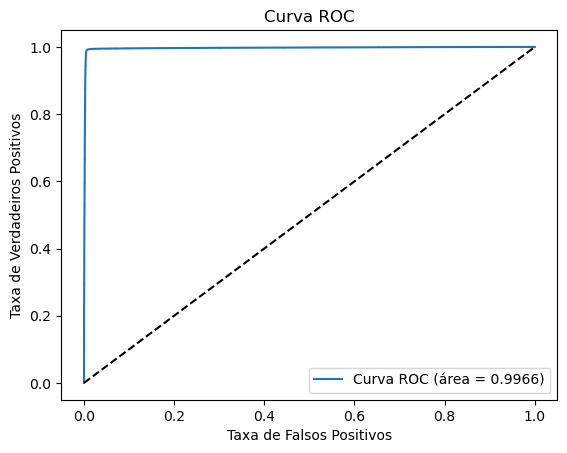

In [101]:
avaliar_modelo(y_validacao_codificado, predicoes_floresta, probabilidades_floresta)

In [106]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 1.3 MB/s eta 0:01:58
   ---------------------------------------- 0.1/150.0 MB 1.1 MB/s eta 0:02:23
   ---------------------------------------- 0.3/150.0 MB 2.0 MB/s eta 0:01:14
   ---------------------------------------- 0.6/150.0 MB 3.3 MB/s eta 0:00:45
   ---------------------------------------- 1.0/150.0 MB 4.3 MB/s eta 0:00:35
   ---------------------------------------- 1.4/150.0 MB 5.0 MB/s eta 0:00:30
   ---------------------------------------- 1.8/150.0 MB 5.8 MB/s eta 0:00:26
    --------------------------------------- 2.3/150.0 MB 6.3 MB/s eta 0:00:24
    --------------------------------------- 2.8/150.0 MB 7.2 MB/s eta 0:00:21
    --------------------------------------- 3.5/150.0 MB 7.9 MB/s eta 0:00:19
   - -------------------------------------- 4.2/150.0 MB 8.7 MB/s eta 0:00:17
   - -------------------------------------- 5.0/150.0 MB 9.4 MB/s eta 0

# Classificador XGBoost
Também foi treinado e avaliado com o classificador XGBoost. Vale destacar que a variável alvo está codificada para ser usada com o XGBoost

In [117]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold

N_FOLDS = 5 

modelo_xgb = XGBClassifier(
    n_estimators=500,
    max_depth=20,
    learning_rate=0.1,
    objective='binary:logistic',
    random_state=SEED,
    eval_metric='logloss'
)

validador_cruzado = KFold(n_splits=N_FOLDS, shuffle=True, random_state=SEED)

escores_cv = cross_val_score(
    modelo_xgb,
    X_treino_normalizado,
    y_treino_codificado,
    cv=validador_cruzado,
    scoring='accuracy'
)

print("\nPontuações da validação cruzada:", escores_cv)
print(f"Acurácia média: {escores_cv.mean():.4f} ± {escores_cv.std():.4f}")

respostas_xgb, probabilidades_xgb = treinar_modelo(
    modelo_xgb,
    y_treino_codificado,
    y_validacao_codificado
)



Pontuações da validação cruzada: [0.99222042 0.99228271 0.99231493 0.99235357 0.9921753 ]
Acurácia média: 0.9923 ± 0.0001


Acurácia: 0.9924
F1 Score: 0.9924

Matriz de Confusão:
[[263203   1889]
 [  2536 314344]]

AUC-ROC: 0.9968


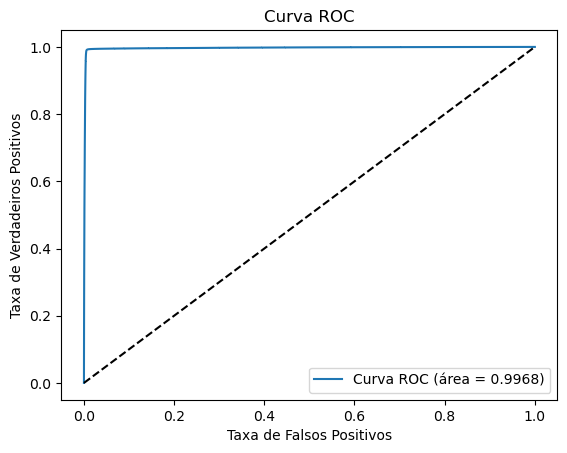

In [119]:
avaliar_modelo(y_validacao_codificado, respostas_xgb, probabilidades_xgb)

In [121]:
# Normaliza os dados de teste
X_teste_normalizado = normalizador.transform(df_teste_codificado.drop(['id'], axis=1))

# Realiza a predição com o modelo treinado
respostas_novas = modeloImp_xgb.predict(X_teste_normalizado)

# Decodifica os rótulos previstos
respostas_novas_decodificadas = codificador.inverse_transform(respostas_novas)

# Cria o DataFrame de previsões
df_previsoes = pd.DataFrame({
    'id': df_teste_codificado['id'],
    'class': respostas_novas_decodificadas
})

# Salva em um arquivo CSV
nome_arquivo_csv = "previsoes_xgb.csv"
df_previsoes.to_csv(nome_arquivo_csv, index=False)

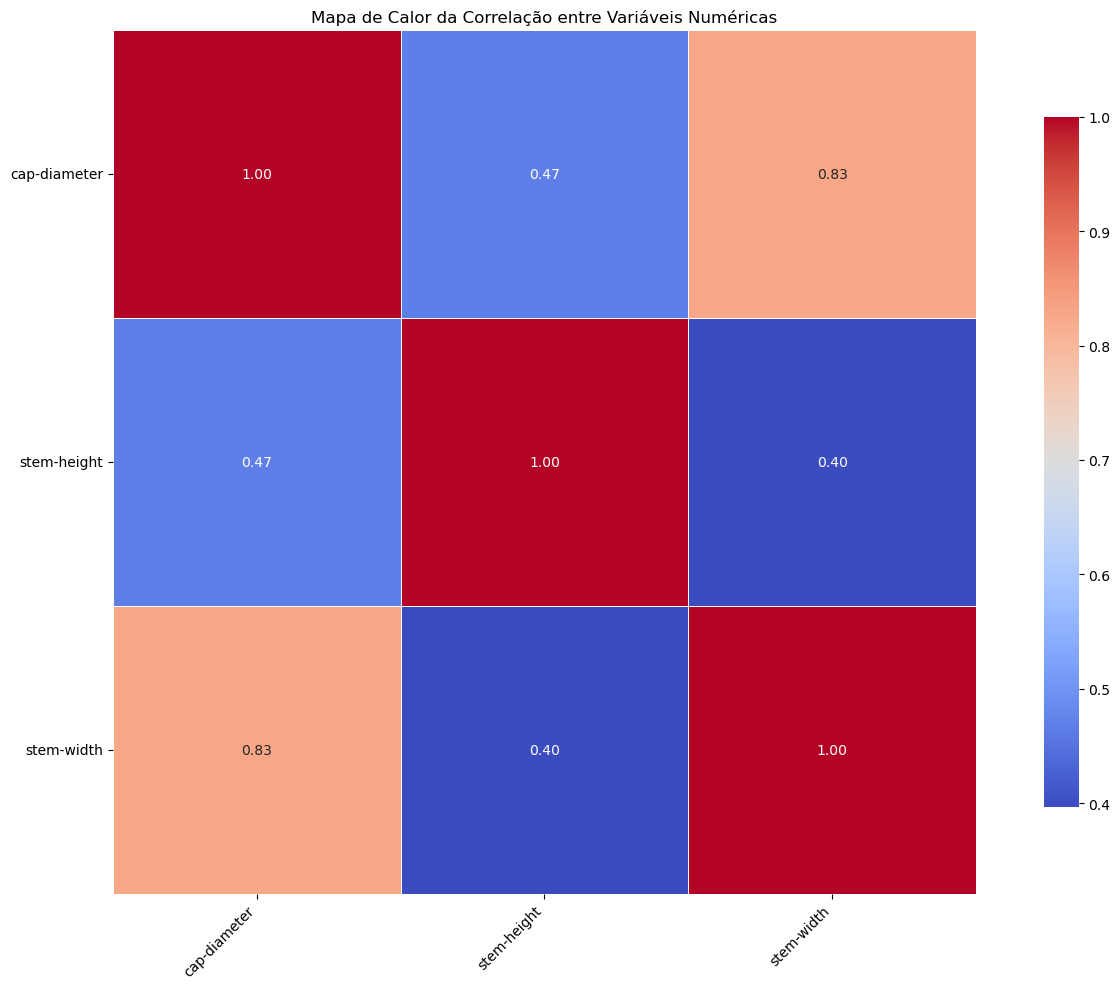

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleciona colunas numéricas e remove 'id'
colunas_numericas_corr = df_filtrado.select_dtypes(include=['int64', 'float64']).drop(columns=['id'])

# Calcula a matriz de correlação
matriz_correlacao = colunas_numericas_corr.corr()

# Cria a figura
plt.figure(figsize=(14, 10))
sns.heatmap(
    matriz_correlacao,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Mapa de Calor da Correlação entre Variáveis Numéricas")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig("mapa_correlacao.png", dpi=300)

# Exibe a imagem
plt.show()
